NaiveBayes Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("Titanic-Dataset.csv")

df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [2]:
#Handling Missingvalues
imputer = SimpleImputer(strategy = 'median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode 'Embarked' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,2


     Pclass   Age  SibSp  Parch     Fare  Embarked
331       1  45.5      0      0  28.5000         2
733       2  23.0      0      0  13.0000         2
382       3  32.0      0      0   7.9250         2
704       3  26.0      1      0   7.8542         2
813       3   6.0      4      2  31.2750         2
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64
     Pclass   Age  SibSp  Parch     Fare  Embarked
709       3  28.0      1      1  15.2458         0
439       2  31.0      0      0  10.5000         2
840       3  20.0      0      0   7.9250         2
720       2   6.0      0      1  33.0000         2
39        3  14.0      1      0  11.2417         0
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64
Confusion Matrix:
 [[86 19]
 [37 37]]
Accuracy: 0.6871508379888268


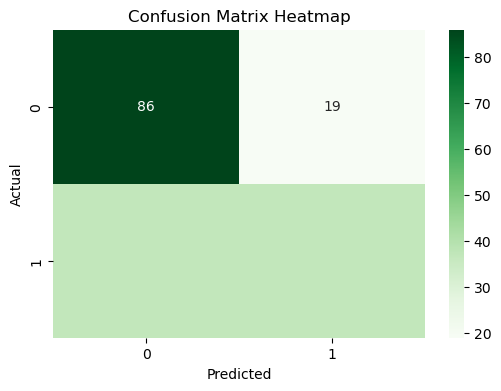

In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()